# Import

In [1]:
import perceval as pcvl
from perceval.polyquantique.algorithm.BasicStateJitter import BasicStateJitter,SourceJitter
from perceval.polyquantique.algorithm.ProcessorJitter import ProcessorJitter
from perceval.polyquantique.algorithm.DistributionEnvelope import Schmidt
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc 
import itertools

# SourceJitter

## Init Source

In [2]:
distribution_list = ["Dirac",1]
envelope_list = ["Exponential",1e12]
range = [-10e-12,30e-12]
size_vect = 10000
source = SourceJitter(distribution_list,envelope_list , range = range , size_vect =size_vect )

## Methode : Test distribution

In [3]:
print(source.distribution_jitter(5))

[0 0 0 0 0]


## Methode : Test Envelope

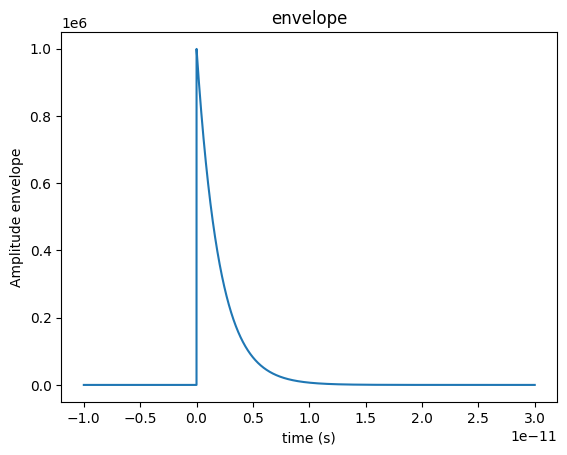

In [4]:
x = source.space_array
y = source.envelope_vector(x)
plt.plot(x,y)
plt.title('envelope')
plt.xlabel('time (s)')
plt.ylabel('Amplitude envelope')
plt.show()

# BasicStateJitter

## Init

In [5]:
state = "|1,0,0,1>"
offset = np.array([0,0,0,0.5])*1e-12
bv = BasicStateJitter(state,offset=offset,source=source)

## Propery : print_vect

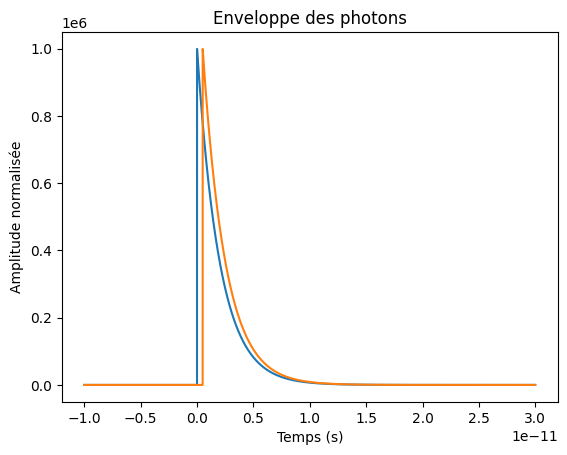

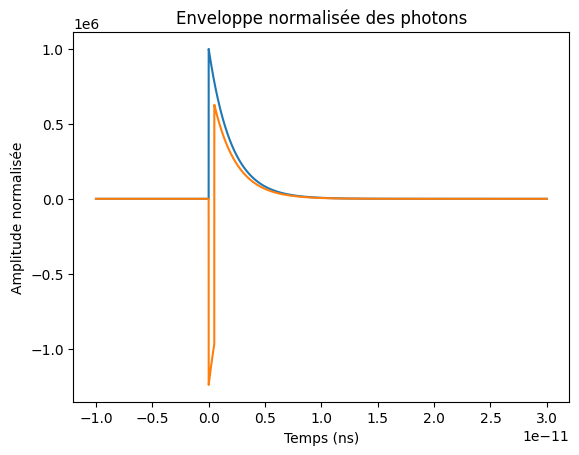

In [6]:
bv.print_vect

## Coefficient matrix

In [7]:
print(bv.coef_matrix)

[[1.00049984 0.        ]
 [0.7791511  0.62759338]]


## coef_list and bs_vector

In [8]:
print(bv.coef_list )
print(bv.bs_vector)

[0.60768347 0.39426729 0.         0.        ]
[[(1, 0, 0, 1), (0, 0, 0, 0)], [(1, 0, 0, 0), (0, 0, 0, 1)], [(0, 0, 0, 1), (1, 0, 0, 0)], [(0, 0, 0, 0), (1, 0, 0, 1)]]


# Create CNOT circuit

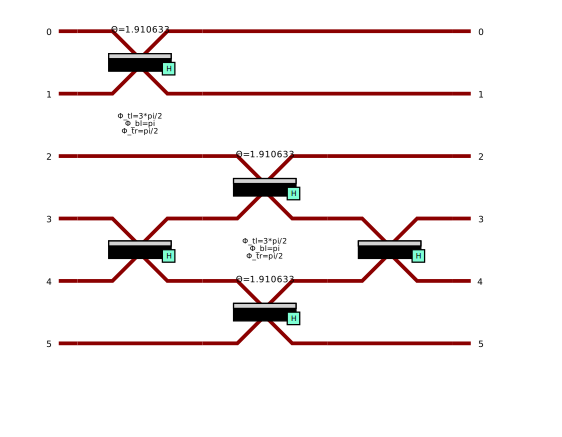

In [9]:
cnot = pcvl.Circuit(6, name="Ralph CNOT")
cnot.add((0, 1), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((3, 4), pcvl.BS.H())
cnot.add((2, 3), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((4, 5), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((3, 4), pcvl.BS.H())

pcvl.pdisplay(cnot)

# Use processor on CNOT

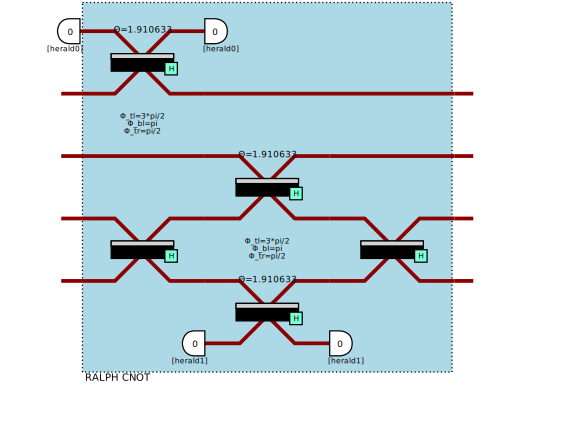

In [10]:
processor = pcvl.Processor("Naive", cnot)
processor.add_herald(0, 0)
processor.add_herald(5, 0)
pcvl.pdisplay(processor, recursive = True)


# ProcessorJitter

In [13]:
Pj = ProcessorJitter(bv,processor)
pcvl.pdisplay(Pj.analyser)
Pj.print_output()

[(1, 0, 0, 1)]


IndexError: list index out of range